In [1]:
import crypto_portfolio as cp
%load_ext autoreload
%autoreload 2
%matplotlib inline

### 2 years - 30-day crypto historical data analysis

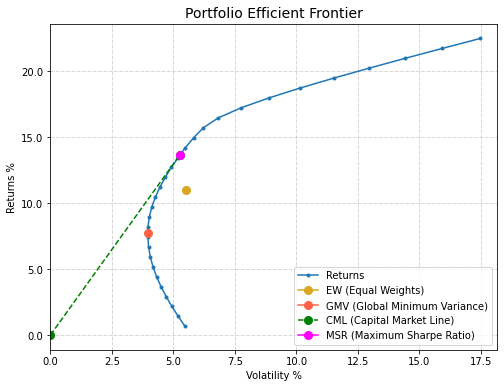

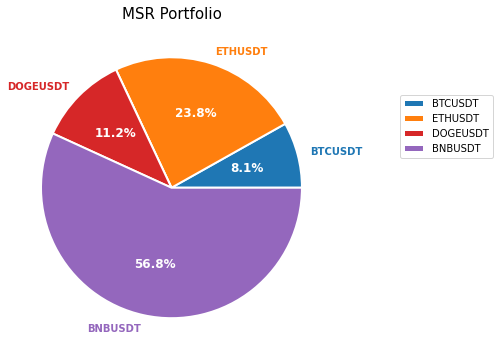

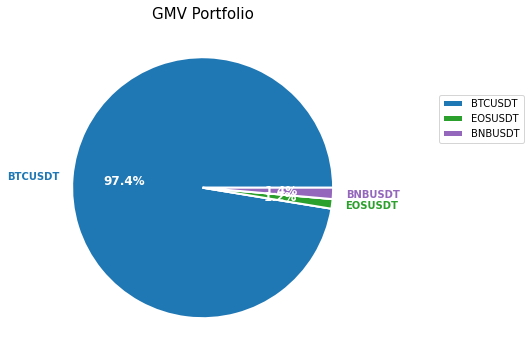

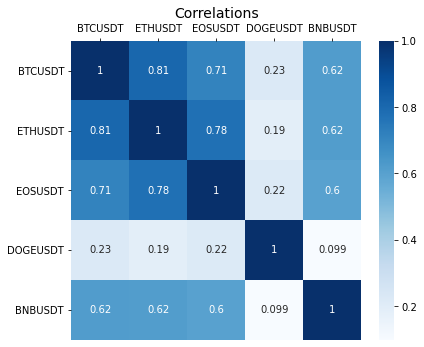

In [15]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT', 'BNBUSDT']
plotlist=['corr_map', 'price', 'ret', 'vol','sr',
          'peak', 'wealth', 'drawdown','ef', 'msr_struct', 'gmv_struct']
plotlist=['ef', 'msr_struct', 'gmv_struct', 'corr_map']
cp.historical_tradedata_analysis(tradepairs, '2 year ago', interval='1d',
                                 period_info={'name':'30 Day', 'intervals':30},
                                 plotlist=plotlist)

### 30 days - daily crypto historical data analysis

In [ ]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT', 'BNBUSDT']
plotlist=['corr_map', 'price', 'ret', 'vol','sr',
          'peak', 'wealth', 'drawdown','ef', 'msr_struct', 'gmv_struct']
plotlist=['ef', 'msr_struct', 'gmv_struct']
cp.historical_tradedata_analysis(tradepairs, '30 day ago', interval='1h',
                                 period_info={'name':'Daily', 'intervals':24},
                                 plotlist=plotlist)

### 7 days - daily crypto historical data analysis

In [ ]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT']
plotlist=['corr_map', 'price', 'ret', 'vol','sr',
          'peak', 'wealth', 'drawdown','ef', 'msr_struct', 'gmv_struct']
plotlist=['ef', 'msr_struct', 'gmv_struct']
cp.historical_tradedata_analysis(tradepairs, '7 day ago', interval='1h',
                                 period_info={'name':'Daily', 'intervals':24},
                                 plotlist=plotlist)

### 1 day - hourly crypto historical data analysis

In [ ]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT', 'BNBUSDT']
plotlist=['corr_map', 'price', 'ret', 'vol','sr',
          'peak', 'wealth', 'drawdown','ef', 'msr_struct', 'gmv_struct']
plotlist=['ef', 'msr_struct', 'gmv_struct']
cp.historical_tradedata_analysis(tradepairs, '1 day ago', interval='1m',
                                 period_info={'name':'Hourly', 'intervals':60},
                                 plotlist=plotlist)

### 1 hour - minute crypto historical data analysis

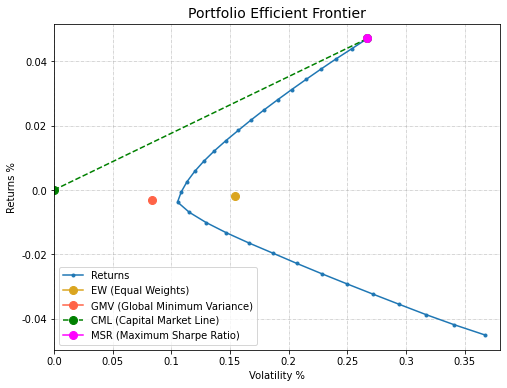

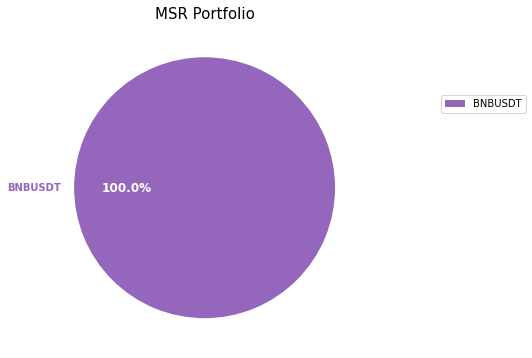

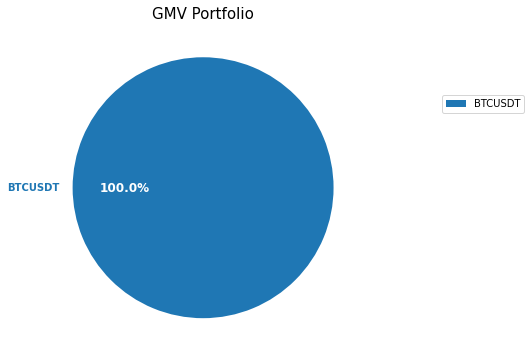

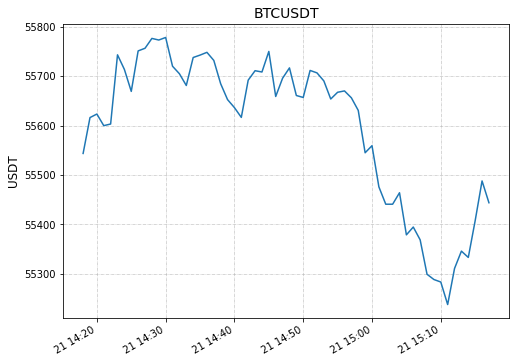

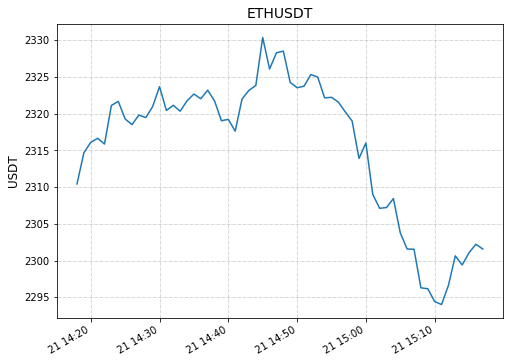

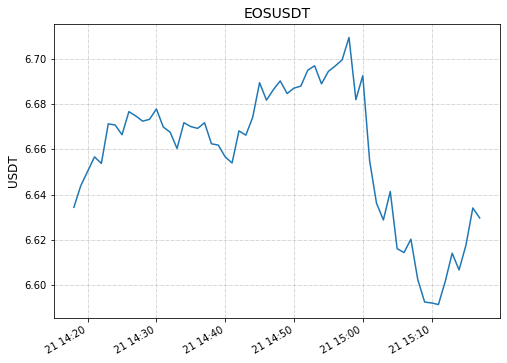

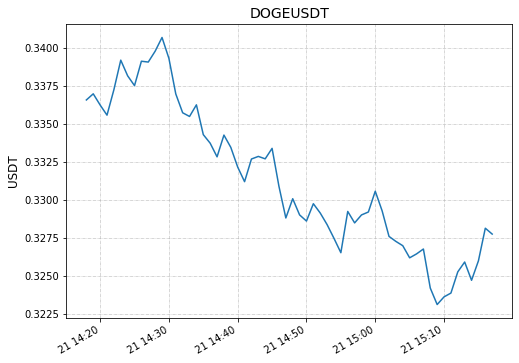

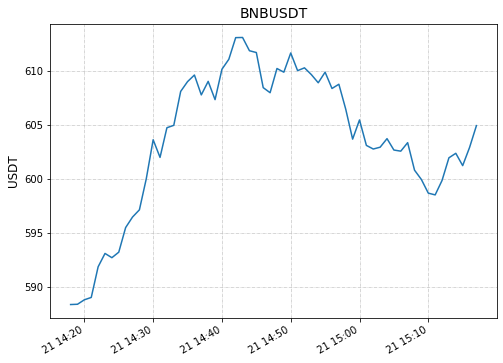

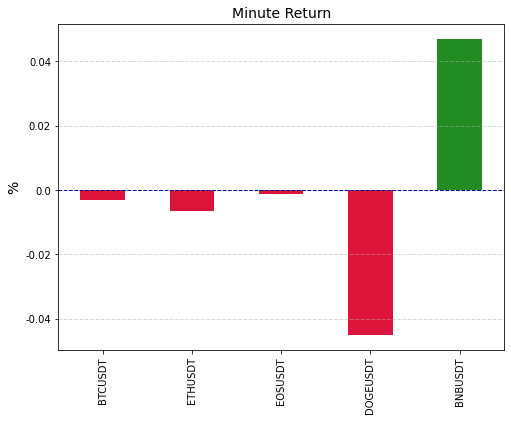

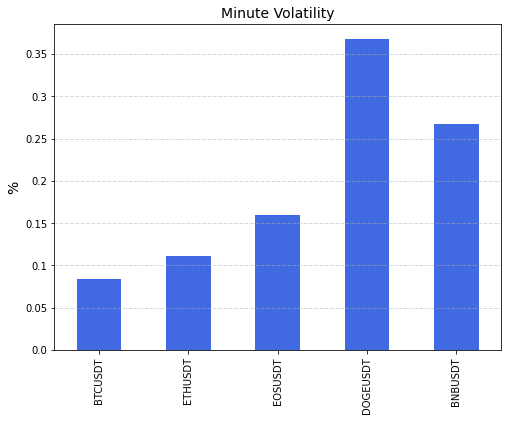

In [21]:
tradepairs = ['BTCUSDT', 'ETHUSDT', 'EOSUSDT', 'DOGEUSDT', 'BNBUSDT']
plotlist=['corr_map', 'price', 'ret', 'vol','sr',
          'peak', 'wealth', 'drawdown','ef', 'msr_struct', 'gmv_struct']
plotlist=['ef', 'msr_struct', 'gmv_struct', 'price', 'ret','vol']
cp.historical_tradedata_analysis(tradepairs, '1 hour ago', interval='1m',
                                 period_info={'name':'Minute', 'intervals':1},
                                 plotlist=plotlist)